## Imports

In [1]:
# exploratory tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#sklean models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#model evaluatiom tools
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_roc_curve




## STEP 1. PROBLEM DEFINITION

predicting wheather or not a patient has a heart disease using machine learning


## STEP 2. EXPLORING THE DATA

In [2]:
#loading the dataset
df = pd.read_csv('data/heart-disease.csv')


In [35]:
#visualizing the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### let's see how different features of our dataset relates the output of the  target column
we do this by observing the mean target rating for the top and bottom half of each features





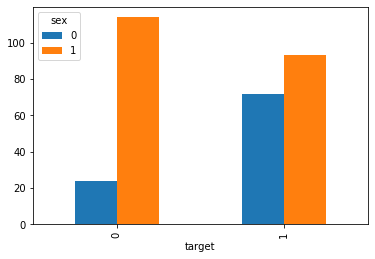

In [3]:
pd.crosstab(df.target, df.sex).plot(kind='bar');

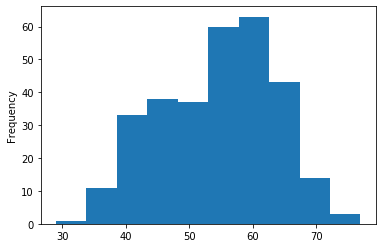

In [4]:
#checking for outliers
df.age.plot.hist();

In [5]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


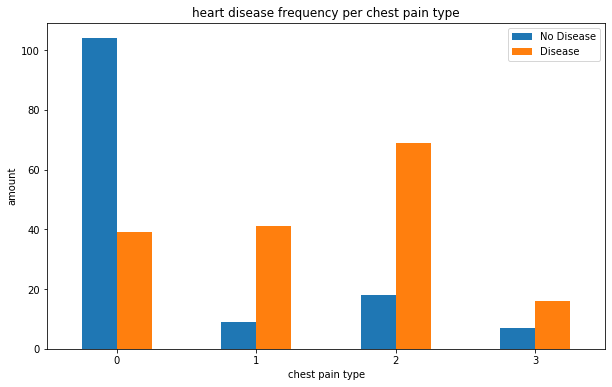

In [6]:
pd.crosstab(df.cp, df.target).plot(figsize=(10,6),
                                   kind='bar');
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);


## STEP 5: MODELLING

In [7]:
#splitting the data into features and labels
X = df.drop('target', axis=1)
y = df['target']

#splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

### Now i write  a function that iterates over the three algorithms and returns their base scores to see which performs better with the default parameters

In [8]:
# create a dictionary with model names as keys and model class as values
models ={'LogisticRegression':LogisticRegression(),
         'SVC':SVC(),
         'RandomForest': RandomForestClassifier()}

#defining a function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    this functions takes in 3 parameters, (model, traininng and testing data)
    and automatically fits and scores on each models stored in the dictionary
    iteratively.
    
    
    Returns: the function returns the model_scores of each models
    
    """
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[name] = round(score, 2)
        
    return model_scores
    
    
        
result = fit_and_score(models, X_train, X_test, y_train, y_test)
result

C:\Users\samue\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'LogisticRegression': 0.9, 'SVC': 0.66, 'RandomForest': 0.84}

## Hyperparameter tunning for SVM using GridSearchCV

In [9]:
#define the grid parameters
svc_grid = {'C': [0.1, 1, 10], 'kernel': ['linear']}

#instantiate the GridsearchCV 
svc_clf = GridSearchCV(estimator = SVC(), param_grid= svc_grid, cv=5, verbose=True)

#fit the training data
svc_clf.fit(X_train, y_train)



Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   34.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [12]:
svc_clf.best_params_ , svc_clf.score(X_test, y_test)

({'C': 1, 'kernel': 'linear'}, 0.8852459016393442)

### We can see that after tunning the hyperparameter of the support vector machine, the score increased from 66% to 89%. Hence by observations, we can see that the LogisticRegression model out performs the other models

### Making predictions on the test data using our LogisticRegressionModel

In [24]:
#instantiating the LogisticRegression model
clf = LogisticRegression()

#fitting the clasifier with training data
clf.fit(X_train, y_train)

# making predictions
y_preds = clf.predict(X_test)


C:\Users\samue\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
# The truth labels
np.array([y_test])

array([[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]], dtype=int64)

## from above comparision, we can see that our model is making predictions not too far from the truth labels (y_test)

## STEP 5 : Model Evaluation
In this step, we check how our model's perfomance by performing the following steps

*Compute the Confusion matrix.

*Compute the Classification Report.

### Confusion_matrix

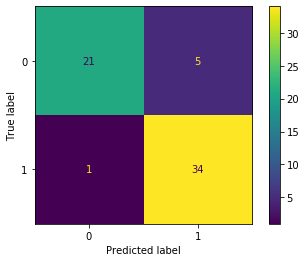

In [29]:
plot_confusion_matrix(clf, X_test, y_test);

## Classification Report

In [31]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



## ROC Curve

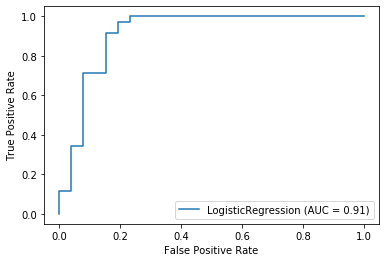

In [33]:
plot_roc_curve(clf, X_test, y_test);